In [1]:
import os
import glob
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing some useful packages
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
df_label = pd.read_csv('label.csv')
df_label

,Value,Tag
0,0,None
1,1,Buildings
2,2,Fences
3,3,Other
4,4,Pedestrians
5,5,Poles
6,6,RoadLines
7,7,Roads
8,8,Sidewalks
9,9,Vegetation


## helper function

In [1]:
def showImageList(images_list, images_label, cols=2, fig_size=(26, 22) ):

    rows = len(images_list)
    gs = gridspec.GridSpec(rows, cols)
    gs.update(hspace=0.3,wspace=0.07)
    fig1 = plt.figure(figsize=fig_size)
    ax = []
    cmap = None
    for i in range( rows * cols):        
        r = (i // cols)
        c = i % cols

        img = images_list[r][c]
        lbl = images_label[r][c]
        
        if len(img.shape) < 3 or img.shape[-1] < 3:
            cmap = "gray"
            img = np.reshape(img, (img.shape[0], img.shape[1]))        
        
        ax.append(fig1.add_subplot(gs[r, c]))
        ax[-1].set_title('%s' % str(lbl))
        
        ax[-1].imshow(img, aspect="auto", cmap=cmap)
        #ax[-1].axis("off")
    plt.show()


## load images and labels

In [3]:
CameraRGB = "Train/CameraRGB"
CameraSeg = "Train/CameraSeg"

image_filenames = glob.glob( os.path.join( CameraRGB, "*.png") )
print("image size..",len(image_filenames))
label_filenames = glob.glob( os.path.join( CameraSeg, "*.png") )
print("label size..",len(label_filenames))

image size.. 1000
label size.. 1000


In [15]:
label_filenames[:2]

['Train/CameraSeg/348.png', 'Train/CameraSeg/412.png']

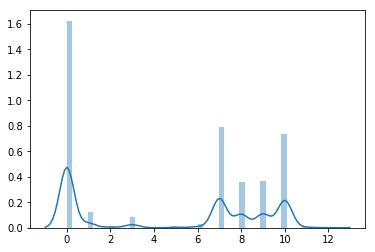

In [17]:
label = image_ops(label_filenames[0])[:,:,2]
sns.distplot(label.ravel() )

In [4]:
image_ops = lambda x:cv2.imread(x)
image_cut_ops = lambda x:x[:500,:,:]
r_cut_ops = lambda x:x[:,:,0]
#bgr_rgb_ops = lambda x:cv2.cvtColor(x,)

In [5]:
data_images = list(map( image_ops, image_filenames  ))

In [6]:
all_labels = list(map( image_ops, label_filenames  ))

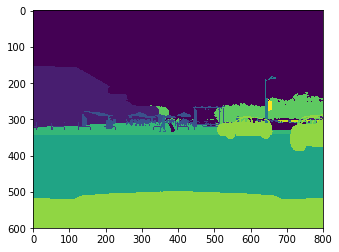

In [7]:
plt.imshow( all_labels[8][:,:,2] )

In [10]:
set( all_labels[8][:,:,2].ravel() )

{0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12}

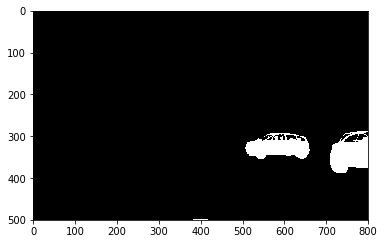

In [13]:
test_label = all_labels[8][:500,:,2] 
binary_label= np.zeros_like(test_label)
binary_label[test_label == 10] = 1
plt.imshow(binary_label, cmap="gray")


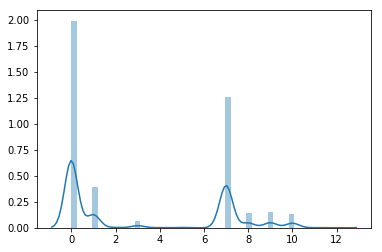

In [14]:
sns.distplot(test_label.ravel())